# Input the necessary packages

In [24]:
import numpy as np

## check the keras status

In [25]:
import keras

In [26]:
keras.__version__

'2.6.0'

In [27]:
from keras.models import Sequential

In [28]:
from keras.datasets import mnist # load in the data (important)
from keras.layers import Dense, Dropout, Activation, Flatten

In [29]:
from keras.utils import np_utils # let label transit to 0ne-hot-encoding

In [30]:
from matplotlib import pyplot as plt
import cv2

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # grouping the minst's data to train and test group

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [32]:
print(X_train.shape)  #there are 60000 test images, and the image is in 28 x 28 format

(60000, 28, 28)


In [33]:
print(y_train.shape) # the corresponging number with respect to 60000 images is 60000 as predicted

(60000,)


In [34]:
model = Sequential() # create linear implementing model

In [35]:
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) # add input layer and hidden layer

In [36]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # add output layer


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compilation: Choose loss function, optimization method and effectiveness measurement method

In [38]:
y_TrainOneHot = np_utils.to_categorical(y_train)

In [39]:
y_TestOneHot = np_utils.to_categorical(y_test)

In [40]:
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')
X_test_2D = X_test.reshape(10000, 28*28).astype('float32') # 2D-1D(important)
X_train_2D.shape,X_test_2D.shape

((60000, 784), (10000, 784))

# check the train images

In [41]:
print(X_train.shape) #there are 10000 test images, and the image is in 28 x 28 format

(60000, 28, 28)


In [42]:
print(y_train.shape)

(60000,)


In [43]:
print("X_test_2D: ",X_test_2D.shape)


X_test_2D:  (10000, 784)


In [44]:
print('X_train_2d',X_train_2D.shape)

X_train_2d (60000, 784)


In [45]:
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255 # important process

In [46]:
scores = model.evaluate(x_Test_norm, y_TestOneHot) #before traing the model

313/313 [==============================] - 1s 2ms/step - loss: 2.3842 - accuracy: 0.0857


In [47]:
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

	[Info] Accuracy of testing data = 8.6%


In [48]:
X = x_Test_norm[11:20,:]
predictions = model.predict(X)
classes =np.argmax(predictions,axis=1)

In [49]:
print(predictions)

[[0.11330923 0.13611278 0.11591563 0.0709543  0.09539624 0.17563704
  0.05094003 0.08464314 0.10873552 0.04835609]
 [0.12877975 0.08868659 0.10564003 0.12029012 0.06269046 0.12936723
  0.06224227 0.14217173 0.10749072 0.0526411 ]
 [0.10043588 0.10642592 0.12073739 0.09308893 0.05646504 0.16992581
  0.07912876 0.08253215 0.12657863 0.06468143]
 [0.14353113 0.092429   0.09279839 0.08573375 0.09566641 0.15604539
  0.0828768  0.09324902 0.0919171  0.06575301]
 [0.13887121 0.09238654 0.11409723 0.09047209 0.07482474 0.14687823
  0.08766046 0.07610529 0.10353093 0.07517339]
 [0.08344811 0.12461608 0.07859153 0.08837836 0.0958231  0.17638054
  0.08544236 0.12008426 0.09635431 0.0508813 ]
 [0.10124994 0.14091054 0.09871953 0.11203858 0.07348507 0.11049043
  0.08921283 0.11094857 0.11021611 0.05272838]
 [0.1333003  0.08977256 0.0784498  0.12395037 0.06732949 0.17631392
  0.07396588 0.07050441 0.11241934 0.07399391]
 [0.12209978 0.0977326  0.09668707 0.08392653 0.06681082 0.14515759
  0.08792889

In [50]:
img = cv2.resize(cv2.imread('5.png', 2),(28,28));

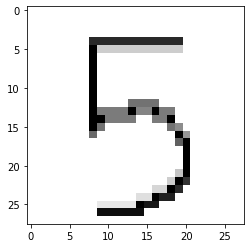

In [51]:
# cv2.imshow('My Image', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [52]:
# img

In [53]:
# cv2.waitKey(0)

In [54]:
# cv2.destroyAllWindows()

In [55]:
img_2D = img.reshape(1,28*28).astype('float32')
img_norm=img_2D/255
img = img_norm
predictions = model.predict(img)

In [56]:
img_2D = img.reshape(1,28*28).astype('float32')
img_norm=img_2D/255
img = img_norm
predictions = model.predict(img)

In [57]:
print(predictions)

[[0.10036287 0.09990556 0.09965712 0.1002576  0.09963614 0.10076279
  0.09980816 0.10025468 0.10001904 0.09933602]]


# now we are going to train the data to get model

In [58]:
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.001, epochs=100, batch_size=800, verbose=2)


Epoch 1/100
75/75 - 1s - loss: 0.7075 - accuracy: 0.8225 - val_loss: 0.1479 - val_accuracy: 0.9833
Epoch 2/100
75/75 - 0s - loss: 0.2712 - accuracy: 0.9240 - val_loss: 0.1036 - val_accuracy: 0.9833
Epoch 3/100
75/75 - 0s - loss: 0.2121 - accuracy: 0.9407 - val_loss: 0.0687 - val_accuracy: 1.0000
Epoch 4/100
75/75 - 0s - loss: 0.1726 - accuracy: 0.9517 - val_loss: 0.0601 - val_accuracy: 1.0000
Epoch 5/100
75/75 - 0s - loss: 0.1456 - accuracy: 0.9594 - val_loss: 0.0518 - val_accuracy: 1.0000
Epoch 6/100
75/75 - 0s - loss: 0.1251 - accuracy: 0.9646 - val_loss: 0.0552 - val_accuracy: 0.9833
Epoch 7/100
75/75 - 0s - loss: 0.1078 - accuracy: 0.9698 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 8/100
75/75 - 0s - loss: 0.0947 - accuracy: 0.9738 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 9/100
75/75 - 0s - loss: 0.0834 - accuracy: 0.9769 - val_loss: 0.0443 - val_accuracy: 0.9833
Epoch 10/100
75/75 - 0s - loss: 0.0744 - accuracy: 0.9793 - val_loss: 0.0359 - val_accuracy: 0.9833
Epoch 11/

Epoch 83/100
75/75 - 0s - loss: 3.6774e-04 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9833
Epoch 84/100
75/75 - 0s - loss: 3.4678e-04 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 0.9833
Epoch 85/100
75/75 - 0s - loss: 3.3118e-04 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9833
Epoch 86/100
75/75 - 0s - loss: 3.1509e-04 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 0.9833
Epoch 87/100
75/75 - 0s - loss: 3.0353e-04 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 0.9833
Epoch 88/100
75/75 - 0s - loss: 2.8616e-04 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9833
Epoch 89/100
75/75 - 0s - loss: 2.7115e-04 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 0.9833
Epoch 90/100
75/75 - 0s - loss: 2.6039e-04 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 0.9833
Epoch 91/100
75/75 - 0s - loss: 2.5014e-04 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9833
Epoch 92/100
75/75 - 0s - loss: 2.3681e-04 - accuracy: 1.0000 - 

In [59]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)

313/313 [==============================] - 0s 923us/step - loss: 0.0981 - accuracy: 0.9796


## after trainging, the accuracy was increased from 0.1358 to  0.9668

In [60]:
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))


	[Info] Accuracy of testing data = 98.0%


### assess again

In [61]:
img=cv2.imread('3.png', cv2.IMREAD_GRAYSCALE)

In [62]:
crop_size = (28, 28)
img = cv2.resize(img, crop_size, interpolation = cv2.INTER_CUBIC)

In [63]:
img_2D = img.reshape(1,28*28).astype('float32')
img_norm=img_2D/255
img = img_norm
predictions = model.predict(img)

In [64]:
print(predictions)

[[5.5783940e-18 3.7994577e-29 1.2853012e-03 3.0815561e-04 0.0000000e+00
  9.9840659e-01 1.6852350e-09 1.4015111e-15 6.1184054e-16 0.0000000e+00]]


In [65]:
img=cv2.imread('3.png', cv2.IMREAD_GRAYSCALE)

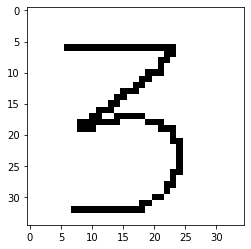

In [66]:
# cv2.imshow("image", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [67]:
#  cv2.waitKey(0)

In [68]:
crop_size = (28, 28)
img = cv2.resize(img, crop_size, interpolation = cv2.INTER_CUBIC)

In [69]:
img_2D = img.reshape(1,28*28).astype('float32')
img_norm=img_2D/255
img = img_norm
predictions = model.predict(img)


In [70]:
print(predictions)

[[5.5783940e-18 3.7994577e-29 1.2853012e-03 3.0815561e-04 0.0000000e+00
  9.9840659e-01 1.6852350e-09 1.4015111e-15 6.1184054e-16 0.0000000e+00]]
